In [1]:
library(data.table)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
transpose(): purrr, data.table


In [2]:
data <- fread(
    'zcat < ../../../private_data/FigS13-15_regression_data.tsv.gz', 
    header=TRUE,
    data.table=FALSE
) %>% rename(
    PDE3B = PDE3E
)

Read 488370 rows and 53 (of 53) columns from 0.189 GB file in 00:00:05


In [3]:
repo_dir <- normalizePath('../../../')
out_dir <- file.path(repo_dir, 'figs', basename(getwd()))

In [5]:
data_filtered <- data %>% mutate(
    sex_label = ifelse(sex == 0, 'female', 'male')
) %>% filter(
    white_british == TRUE &
    sex != -9 &
    age > 0
) 

In [6]:
data_filtered %>% dim()

[1] 337199     54

In [7]:
p_INI21002 <- ggplot(
    data_filtered %>% filter(INI21002 != -9 & PDE3B != -9), 
    aes(x = as.factor(PDE3B), y = INI21002)) +
geom_boxplot(aes(group = factor(PDE3B))) +
stat_summary(
    fun.y=mean, colour="darkred", geom="point", 
    shape=18, size=5,show.legend = FALSE) + 
labs(y = 'Weight (INI21002) [kg]')


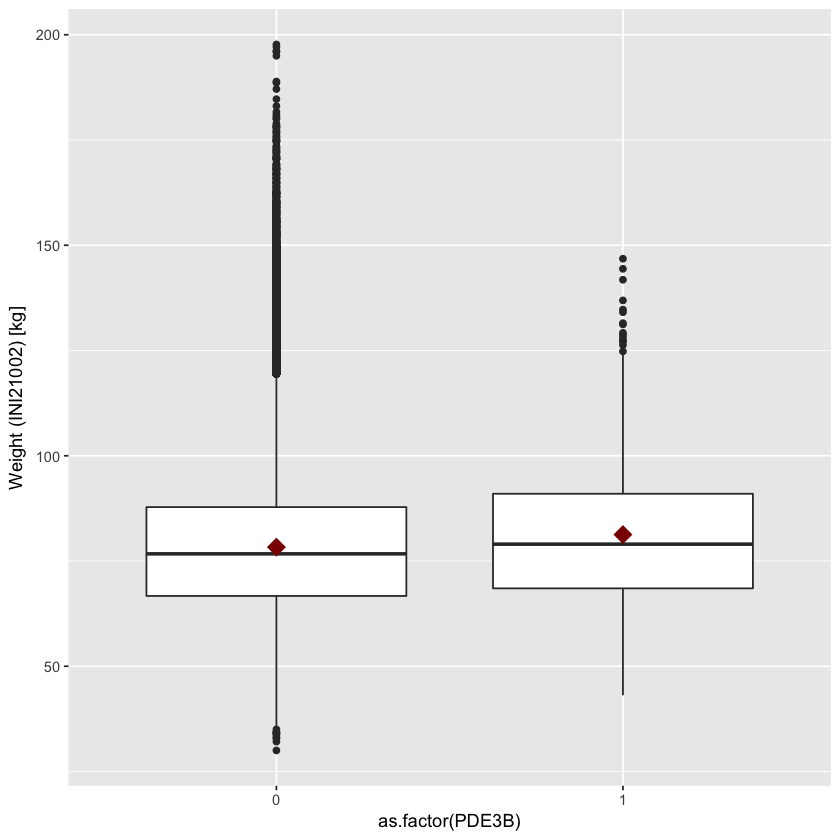

In [8]:
p_INI21002

In [10]:
aggregate(INI21002 ~ as.factor(PDE3B), data_filtered %>% filter(INI21002 != -9 & PDE3B != -9), mean)

as.factor(PDE3B),INI21002
0,78.29103
1,81.27766


Saving 7 x 7 in image


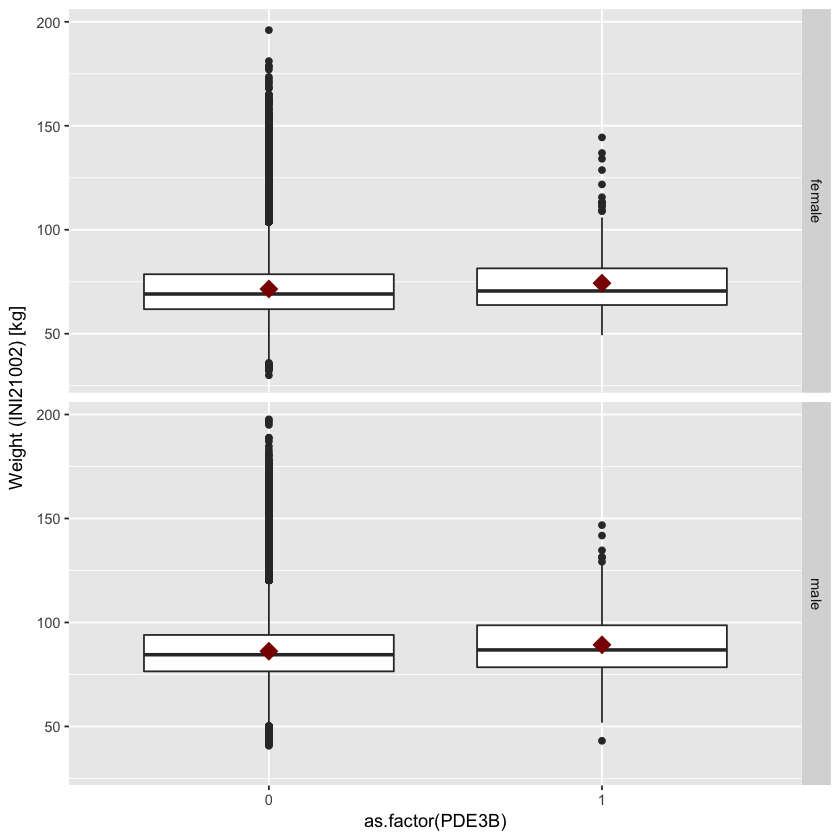

In [11]:
p_INI21002 + facet_grid(sex_label ~ .) + ggsave(
    file.path(out_dir, 'p_INI21002_PDE3B.pdf')
)

In [12]:
aggregate(
    INI21002 ~ as.factor(PDE3B) + as.factor(sex_label),
    data_filtered %>% filter(INI21002 != -9 & PDE3B != -9), mean)



as.factor(PDE3B),as.factor(sex_label),INI21002
0,female,71.49436
1,female,74.31709
0,male,86.17529
1,male,89.25585


In [13]:
aggregate(
    INI21002 ~ as.factor(PDE3B) + as.factor(sex_label),
    data_filtered %>% filter(INI21002 != -9 & PDE3B != -9), length)



as.factor(PDE3B),as.factor(sex_label),INI21002
0,female,179891
1,female,392
0,male,155076
1,male,342


### BMI

In [18]:
lm_INI21002 <- lm (
    INI21002 ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(PDE3B),
    data_filtered %>% filter(INI21002 != -9 & PDE3B != -9)
)


In [19]:
summary(lm_INI21002)


Call:
lm(formula = INI21002 ~ 0 + age + as.factor(sex) + PC1 + PC2 + 
    PC3 + PC4 + as.factor(PDE3B), data = data_filtered %>% filter(INI21002 != 
    -9 & PDE3B != -9))

Residuals:
    Min      1Q  Median      3Q     Max 
-46.051  -9.675  -2.006   7.457 123.536 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
age               -0.075799   0.003034 -24.984  < 2e-16 ***
as.factor(sex)0   76.811498   0.279510 274.807  < 2e-16 ***
as.factor(sex)1   91.528290   0.280854 325.893  < 2e-16 ***
PC1                0.024646   0.015832   1.557    0.120    
PC2               -0.010894   0.016379  -0.665    0.506    
PC3                0.006218   0.015738   0.395    0.693    
PC4                0.007978   0.008679   0.919    0.358    
as.factor(PDE3B)1  2.912140   0.519326   5.608 2.05e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.05 on 335693 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  

In [20]:
p_INI21001 <- ggplot(
    data_filtered %>% filter(INI21001 != -9 & PDE3B != -9), 
    aes(x = as.factor(PDE3B), y = INI21001)) +
geom_boxplot(aes(group = factor(PDE3B))) +
labs(y = 'BMI (INI21001)')


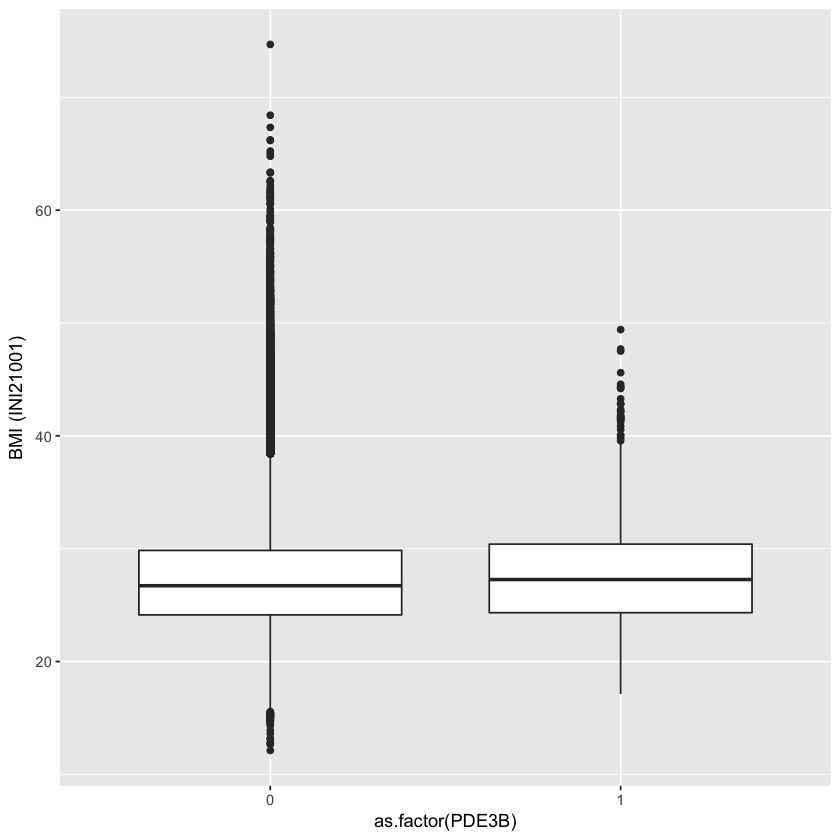

In [21]:
p_INI21001

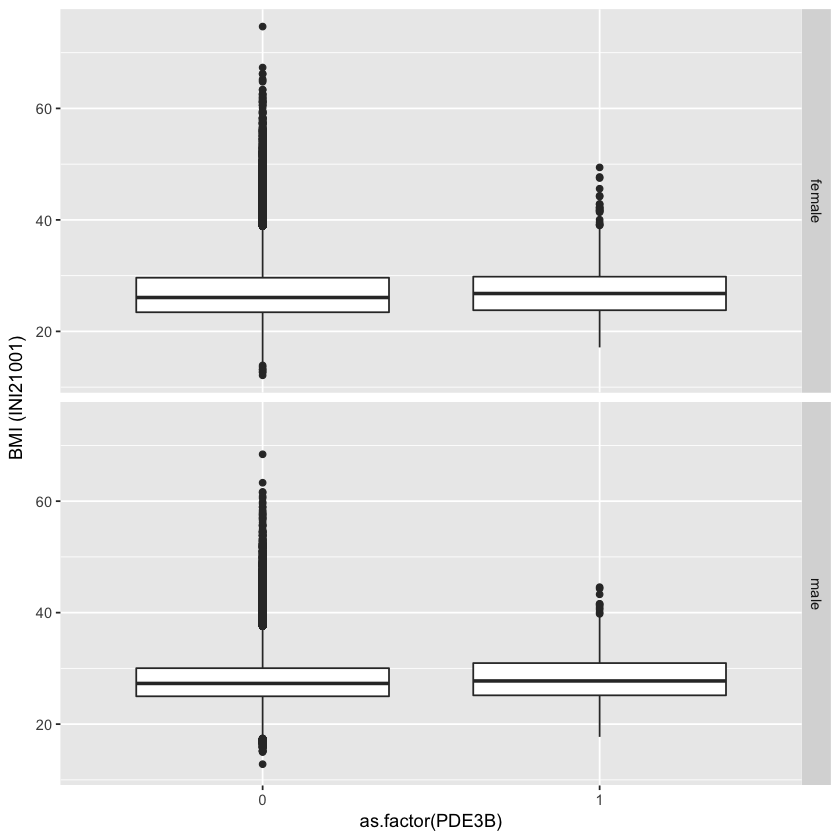

In [22]:
p_INI21001 + facet_grid(sex_label ~ .)

In [23]:
lm_INI21001 <- lm (
    INI21001 ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(PDE3B),
    data_filtered %>% filter(INI21001 != -9 & PDE3B != -9)
)


In [24]:
summary(lm_INI21001)


Call:
lm(formula = INI21001 ~ 0 + age + as.factor(sex) + PC1 + PC2 + 
    PC3 + PC4 + as.factor(PDE3B), data = data_filtered %>% filter(INI21001 != 
    -9 & PDE3B != -9))

Residuals:
    Min      1Q  Median      3Q     Max 
-15.259  -3.229  -0.737   2.384  47.812 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
age                0.025930   0.001020  25.434  < 2e-16 ***
as.factor(sex)0   25.228426   0.093926 268.600  < 2e-16 ***
as.factor(sex)1   26.017439   0.094378 275.673  < 2e-16 ***
PC1               -0.004751   0.005320  -0.893 0.371847    
PC2               -0.005928   0.005504  -1.077 0.281471    
PC3                0.003587   0.005289   0.678 0.497690    
PC4                0.048938   0.002916  16.780  < 2e-16 ***
as.factor(PDE3B)1  0.647053   0.174489   3.708 0.000209 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.722 on 335577 degrees of freedom
Multiple R-squared:  0.9712,	Adjusted R-squared:  

### standing height

In [25]:
p_INI50 <- ggplot(
    data_filtered %>% filter(INI50 != -9 & PDE3B != -9), 
    aes(x = as.factor(PDE3B), y = INI50)) +
geom_boxplot(aes(group = factor(PDE3B))) +
labs(y = 'Standing height (INI50) [cm]')


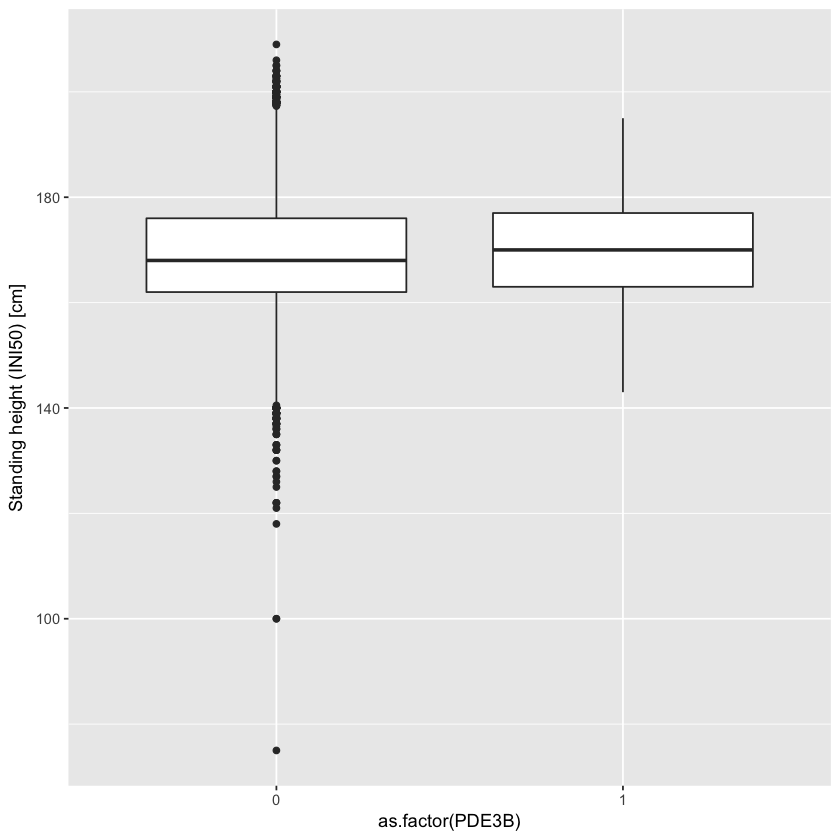

In [26]:
p_INI50

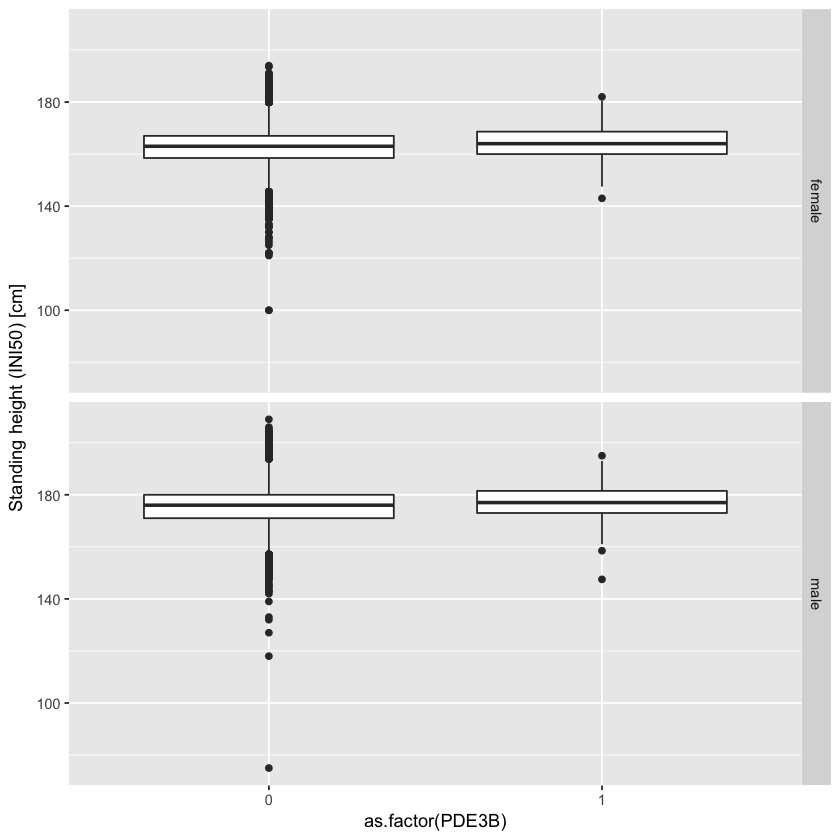

In [27]:
p_INI50 + facet_grid(sex_label ~ .)

In [28]:
lm_INI50 <- lm (
    INI50 ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(PDE3B),
    data_filtered %>% filter(INI50 != -9 & PDE3B != -9)
)


In [29]:
summary(lm_INI50)


Call:
lm(formula = INI50 ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + 
    PC4 + as.factor(PDE3B), data = data_filtered %>% filter(INI50 != 
    -9 & PDE3B != -9))

Residuals:
    Min      1Q  Median      3Q     Max 
-98.838  -4.246  -0.055   4.180  31.151 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
age                -0.158215   0.001365 -115.911  < 2e-16 ***
as.factor(sex)0   173.712373   0.125749 1381.425  < 2e-16 ***
as.factor(sex)1   187.018373   0.126354 1480.109  < 2e-16 ***
PC1                 0.039977   0.007123    5.613 1.99e-08 ***
PC2                 0.007331   0.007370    0.995    0.320    
PC3                -0.005537   0.007082   -0.782    0.434    
PC4                -0.143898   0.003905  -36.853  < 2e-16 ***
as.factor(PDE3B)1   1.196020   0.233578    5.120 3.05e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.325 on 335933 degrees of freedom
Multiple R-squared:  0.9986,	Adjusted 